# W200 Introduction to Data Science Programming, UC Berkeley MIDS


## Instructions
The final exam is designed to evaluate your grasp of Python theory as well as Python coding.

- This is an individual exam.
- You have 24 hours to complete the exam, starting from the point at which you first access it.
- You will be graded on the quality of your answers.  Use clear, persuasive arguments based on concepts we covered in class.
- Please double-click the markdown cells where it says "Your answer here" to input answers (if you need more cells please make them markdown cells)
- Use only Python standard libraries, NumPy and Pandas for this exam

## Samuel Gomez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import matplotlib.ticker as ticker
import re

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

numpy version: 1.17.2
pandas version: 0.25.1


## 1: Short Answer Questions (25 pts - each question = 5 pts)

a) The following class ```Cart``` and method ```add_to_cart``` are parts of a larger program used by a mobile phone company.  The method ```add_to_cart``` will work when an object of type MobileDevice or of type ServiceContract is passed to it. State whether the method ```add_to_cart``` is a demonstration of the following items (yes/no) and the reasoning (1-2 sentences): 

    1. Inheritance
    2. Polymorphism
    3. Duck typing
    4. Top-down design
    5. Functional programming

In [2]:
# Method:
class Cart():
    
    def __init__(self):
        self.cart = []
        self.total = 0
    
    def add_to_cart(item):
        self.cart.append(item)
        self.total += item.price

- a) Your answer here


1. Inheritance:  No. The method add_to_cart is not demonstrating inheritance.  First of all, for to utilize inheritance for add_to_cart, there would need to be a class say 'xyz' like so Cart('xyz').  Second, add_to_cart would inherit it's function from the base class, not define its own function.  If Cart() was a child class, add_to_method would override add_to_cart of its parent class.


2. Polymorphism:  No.  In OOP, polymorphism refers to the ability of a subclass method to override a base class method.  Also, two child classes of the same parent class can have the same method, but that method can perform a different functions.  The fact that class Cart() is not a subclass negates this possibility.    


3. Duck typing:  Yes.  Since the problem statement states add_to_cart works when object types MobileDevice and ServiceContract are passed to it, I can infer that it is demonstrating duck typing.  Duck typing allows different objects of different classes to execute their own function of the same method e.g. add_to_cart.


4. Top-down design:  No.  OOP is classified as a bottom-up style of programming.  It typically adds up modules to perform more complex tasks.  Creating classes, subclasses, and methods are characteristics of bottom-up programming.


5. Functional programming:  No.  This is not functional programming; this is object-oriented programming.  Functional programming is declarative uses of functions to perform computation.

b) Suppose you have a long list of digits (0-9) that you want to write to a file.  From a storage standpoint, would it be more efficient to use ASCII or UTF-8 as an encoding? What is the most efficient way to create an even smaller file to store the information?

- b) Your answer here

ASCII and UTF-8 are equally efficient for encoding integers.  The difference between the two is realized when encoding other characters.  ASCII would be more efficient than UTF-8 in those situations.

Encoding the integer in binary form should be used to create smaller file storage.

c) Why is it important to sanity-check your data before you begin your analysis? What could happen if you don't?

- c) Your answer here

Performing a sanity-check before data analysis is critical.  I haven't done much data analysis prior to this course.  However, just like a lot of the engineering and math applications I have done in the past, it is always best to follow a process.  A data sanity-check should be the step in the data analysis process between importing the data and doing the analysis.  If a proper sanity-check is not performed, the conclusion from the analysis could be wrong, probably more often than not.  An adequate check should verify that all of the data was imported at the very least.  The next step should be checking for correctness  Checking each variable for consistency is also a good practice.  Looking at data distribution for outliers and identifying duplicates in the data is a good check as well.  Only after a thorough data exploration is complete should the analysis begin.

d) How do you determine which variables in your dataset you should check for issues prior to starting an analysis? 

- d) Your answer here

Typically, the nature of the critical data depending on the ensuing analysis dictates which variables I check first or which I check more thoroughly. If I have prior experience with a data set from a particular source, I will check the variables that may have been imported incorrectly in the past.  Next, if the analysis has a constraint--such as the 2016 primary donation HW with donations made to the primary 2016 election--I will check the variables of the constraint for accuracy.  If a specific variable can't have a NaN I will check that as well.   Verifying all variables in a data set is a good practice if time permits.

e1) Explain why the following code prints what it does.

In [3]:
def f(): pass
print(type(f))

<class 'function'>


- e1) The function type( ) in Python returns the class type of the argument passed as a parameter.  Function f( ) is first passed into type( ); this returns <class 'function'>.  Then, the the print statement prints the output of the type method. 

e2) Explain why the following code prints something different.

In [4]:
def f(): pass
print(type(f()))

<class 'NoneType'>


- e2) This code prints something different because the function f( ) is executed, then the type method is invoked.  Since the function returns nothing (pass) the type( ) is 'NoneType'.  If I were to write 'return 1' in function f( ) instead of 'pass', this code would return type 'int'.

## 2:  General Coding Questions (15 pts - each question 5 pts)

a) Using a list comprehension: Make a list of the squared numbers that are the square of non-negative integer less than 10, but whose squares are greater than 25. Fill in a list comprehension below so that we get this desired output.

In [5]:
# 2a) Your code here

squares = [num**2 for num in range(10) if num**2 > 25]
squares

[36, 49, 64, 81]

In [6]:
"""
def map_compute(my_list):
    return list(filter(lambda x: x > 25, map(lambda x: x**2, my_list)))

map_compute(range(0,10))
"""

'\ndef map_compute(my_list):\n    return list(filter(lambda x: x > 25, map(lambda x: x**2, my_list)))\n\nmap_compute(range(0,10))\n'

b) Below is a data frame of customers that have different cooling systems. Your data science team lead wants the column ```cooling_system``` to be labeled with the numbers 1-4 instead of the text as shown below:

- 1 = Air Conditioning / AC / Air Con
- 2 = Heat Pump / HP
- 3 = Evaporative Cooler / Evap Cooler
- 4 = Fan

Make a new column called ```cooling_type``` that maps the text values to the new numeric values. Filter out the values that are not included in the mapping above. Print out this new data frame. Be sure to list any assumptions also!

In [7]:
import pandas

# creating a data frame from scratch - list of lists

data = [ [101, 'AC'], 
         [102, 'Heat Pump'], 
         [103, 'Air Con'], 
         [104, 'Air Conditioning'],
         [105, 'Fan'],
         [106, 'None'],
         [107, 'Evap Cooler'],
         [108, None],
         [109, 'AC'],
         [110, 'Evaporative Cooler'],
         [111, 'geothermal'],
         [112, 1]
       ]

# create a data frame with column names - list of lists

col_names = ['Cust_Number', 'Cooling_System']
df = pandas.DataFrame(data, columns=col_names)
df

,Cust_Number,Cooling_System
0,101,AC
1,102,Heat Pump
2,103,Air Con
3,104,Air Conditioning
4,105,Fan
5,106,None
6,107,Evap Cooler
7,108,None
8,109,AC
9,110,Evaporative Cooler


In [8]:
# 2b) Your code here
df['cooling_type'] = df.Cooling_System.map({'AC':'1','Air Con':'1','Air Conditioning':'1', 'HP':'2', 
                                            'Heat Pump':'2', 'Evap Cooler':'3', 'Evaporative Cooler':'3', 
                                            'Fan':'4'})
df

,Cust_Number,Cooling_System,cooling_type
0,101,AC,1
1,102,Heat Pump,2
2,103,Air Con,1
3,104,Air Conditioning,1
4,105,Fan,4
5,106,None,NaN
6,107,Evap Cooler,3
7,108,None,NaN
8,109,AC,1
9,110,Evaporative Cooler,3


In [9]:
df = df[df.cooling_type.notnull()]
df.reset_index(inplace=True, drop=True)
df

,Cust_Number,Cooling_System,cooling_type
0,101,AC,1
1,102,Heat Pump,2
2,103,Air Con,1
3,104,Air Conditioning,1
4,105,Fan,4
5,107,Evap Cooler,3
6,109,AC,1
7,110,Evaporative Cooler,3


c) From the dataframe below, use groupby/aggregate in Pandas to show how many total delegates were obtained grouped by favorite color. Print this out.

In [10]:
# creating a data frame from scratch - list of lists

data = [ ['marco', 165, 'blue', 'FL'], 
         ['jeb', 0, 'red', 'FL'], 
         ['chris', 0, 'white', 'NJ'], 
         ['donald', 1543, 'white', 'NY'],
         ['ted', 559, 'blue', 'TX'],
         ['john', 161, 'red', 'OH']
       ]

# create a data frame with column names - list of lists

col_names = ['name', 'delegates', 'color', 'state']
df = pandas.DataFrame(data, columns=col_names)
df

,name,delegates,color,state
0,marco,165,blue,FL
1,jeb,0,red,FL
2,chris,0,white,NJ
3,donald,1543,white,NY
4,ted,559,blue,TX
5,john,161,red,OH


In [11]:
# 2c) Your code here
df.groupby('color').agg('sum')

,delegates
color,
blue,724
red,161
white,1543


## 3: Bitcoin coding problem (20 points):

#### Bitcoin

Consider a record of a one-time investment in bitcoin with value of that investment tracked monthly, provided as an (ordered) tuple of dictionaries, where each dictionary comprises one key for the month and corresponding one value for the value of the investment, and the first entry (Jan 2018) is the initial investment, like in `data` below.

Write Python code to take such a record of any length, and output a table/dataframe comprising a row for each month with columns for date, start balance, and return. **Print out this table/dataframe.**

Also, visualize the record as two vertically arranged plots. 
- The top plot should show a line plot of start balance vs. month
- The bottom plot should show a bar plot of return vs. month, with a black horizontal line at return=0, and bars color-coded such that positive returns are green and negative returns are red.  
- The two plots' horizontal axes should align. Demonstrate that your code works by applying it to `data`.

Notes: <br>
- The gain for each period is the end balance minus the start balance. 
- The growth factor for each period is the end balance divided by the start balance.  
- The return for each period is the growth factor minus 1.

In [12]:
data = ({"Jan 2018":1000},{"Feb 2018":1100},{"Mar 2018":1400},{"Apr 2018":700},{"May 2018":800},{"Jun 2018":500})
data

({'Jan 2018': 1000},
 {'Feb 2018': 1100},
 {'Mar 2018': 1400},
 {'Apr 2018': 700},
 {'May 2018': 800},
 {'Jun 2018': 500})

#### Line plot of start vs. month

,date,invest_balance,invest_return
0,Jan 2018,1000.0,10.00
1,Feb 2018,1100.0,27.27
2,Mar 2018,1400.0,-50.00
3,Apr 2018,700.0,14.29
4,May 2018,800.0,-37.50
5,Jun 2018,500.0,NaN


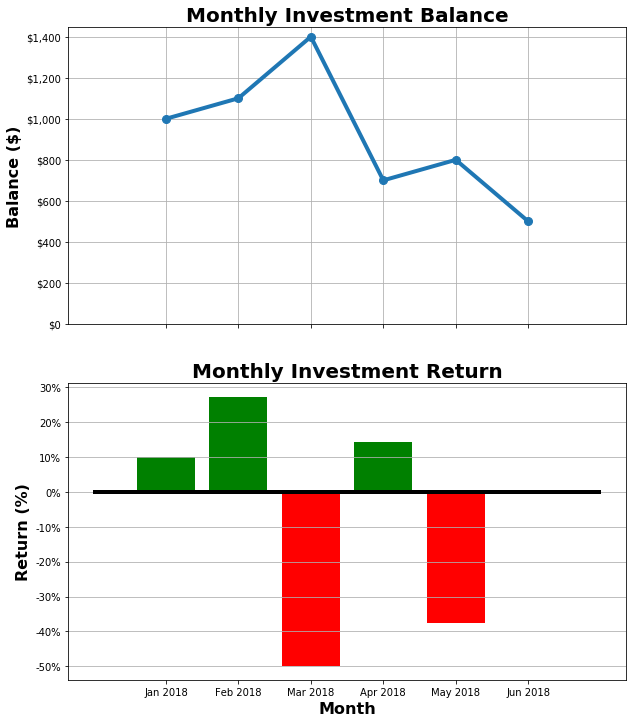

In [13]:
# 3) 

df = pd.DataFrame.from_dict(data)

rows = []
columns = []
for i in range(len(df)):
    rows.append(df.columns[i])
    c = df.columns[i]
    columns.append(df[c].max())


# create date dataframe
df1 = pd.DataFrame(list(rows))
df1.columns = ['date']

# create start_balance data frame
df2 = pd.DataFrame(list(columns))
df2.columns = ['invest_balance']

# create dataframe equal to df1
df=df1



df['invest_balance'] = df2
column2 = []
for num in range(0,len(df)-1):
    gain = df.invest_balance[num+1]-df.invest_balance[num]
    growth = df.invest_balance[num+1] / df.invest_balance[num]
    column2.append(round((growth - 1)*100,2))
    
c2 = pd.DataFrame(list(column2))

df['invest_return'] = c2

display(df)

# Plot
fig, ax = plt.subplots(2,1, figsize = (10,12), sharex=True)

# plot - Monthly Investment Balance
ax[0].plot(df.date, df.invest_balance, linewidth=4, marker='o', markersize=8)
ax[0].set_title('Monthly Investment Balance', fontsize=20, weight='bold')
start, end = ax[0].get_ylim()
ax[0].set_ylim(0)
ax[0].set_ylabel('Balance ($)', fontsize=16, weight='bold')
fmt_dollar = '${x:,.0f}'
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt_dollar))

# determine positive values for return
positive_return = pd.Series(df.invest_return >=0)

# plot - Monthly Investment Return
ax[1].bar(df.date, df.invest_return, color=positive_return.map({True: 'g', False: 'r'}))
ax[1].set_title('Monthly Investment Return', fontsize=20, weight='bold')
ax[1].set_xlabel('Month', fontsize=16, weight='bold')
ax[1].set_ylabel('Return (%)', fontsize=16, weight='bold')
ax[1].hlines(0,-1,len(df.date), linewidth = 4) 
fmt_percent = '{x:,.0f}%'
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt_percent))
ax[0].grid()
ax[1].yaxis.grid()
plt.show()
plt.show()

## 4: Clinical disease data (40 pts)

Your boss comes to you Monday morning and says “I figured out our next step; we are going to pivot from an online craft store and become a data center for genetic disease information! I found **ClinVar** which is a repository that contains expert curated data, and it is free for the taking. This is a gold mine! Look at the file and tell me what gene and mutation combinations are classified as dangerous.”

Make sure that you only give your boss the dangerous mutations and include:

1) Gene name

2) Mutation ID number

3) Mutation Position (chromosome & position)

4) Mutation value (reference & alternate bases)

5) Clinical severity 

6) Disease that is implicated

**Requirements**

1) The deliverables are the final result as a dataframe with a short discussion of any specifics. (that is, what data you would present to your boss with the explanation of your results)

2) Limit your output to the first 100 harmful mutations and tell your boss how many total harmful mutations were found in the file

3) Use the instructor-modified "clinvar_final.txt" at this link: https://drive.google.com/file/d/1Zps0YssoJbZHrn6iLte2RDLlgruhAX1s/view?usp=sharing This file was modified to be not exactly the same as 'standard' .vcf file to test your data parsing skills. **This is a large file so do NOT upload it into your github repo!**

4) Replace missing values in the dataframe with: 'Not_Given'

5) State in your answer how you define harmful mutations

**6) Do your best on getting to above requirements and submit whatever you do before the 24 hour deadline. If your work is incomplete be sure to describe the blockers that got in your way and how you might get past them (if given more time).**

**Hints** 
* We do not expect you to have any medical knowledge to solve this problem; look at the data, read the documentation provided, and write down your assumptions!

* Correct pseudocode will give you partial credit so start with that. 

* Map out which fields you want to extract: Are they in the same place every time? What strategy will you use to robustly extract and filter your data of interest? How do you plan to handle missing data?

* A good way to start is to print out each line, then practice parsing them to see if you can recover the fields of interest

* A starting solution for parsing .vcfs can be found here: https://gist.github.com/dceoy/99d976a2c01e7f0ba1c813778f9db744 This solution does **NOT** work due to the changes we've made but can be modified to work. As with any solution that needs modifications, it may take less time to make your own solution!

* Filter out junk and lines with no mutation data. Just focus on the data your need to deliver to your boss. 

* Pandas and NumPy parsers correctly recognize the end of each line in in the ClinVar file.

* The unit of observation of this dataset is one row per mutation.

* This is similar to a task that one of us tackled at work. You can answer the question with the information provided below or using the (partial) data dictionary file at this link: https://drive.google.com/file/d/1lx9yHdlcqmU_OlHiTUXKC_LQDqYBypH_/view?usp=sharing. Our goal is to see that you can put together a sensible plan, implement a solid parsing strategy, and document and justify the decisions that you made.

### VCF file description (Summarized from version 4.1)

```
* The VCF specification:

VCF is a text file format which contains meta-information lines, a header line, and then data lines each containing information about a position in the genome. The format also can contain genotype information on samples for each position.

* Fixed fields:

There are 8 fixed fields per record. All data lines are **tab-delimited**. In all cases, missing values are specified with a dot (‘.’). 

1. CHROM - chromosome number
2. POS - position DNA nuceleotide count (bases) along the chromosome
3. ID - The unique identifier for each mutation
4. REF - reference base(s)
5. ALT - alternate base(s)
6. FILTER - filter status
7. QUAL - quality
8. INFO - a semicolon-separated series of keys with values in the format: <key>=<data>

```
### Applicable INFO field specifications

```
GENEINFO = <Gene name>
CLNSIG =  <Clinical significance>
CLNDN = <Disease name>
```

### Sample ClinVar data (vcf file format - not exactly the same as the file to download!)

```
##fileformat=VCFv4.1
##fileDate=2019-03-19
##source=ClinVar
##reference=GRCh38							
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO
1	949523	rs786201005	C	T	.	.	GENEINFO=ISG15;CLNSIG=5
1	949696	rs672601345	C	CG	.	.	GENEINFO=ISG15;CLNSIG=5;CLNDBN=Cancer
1	949739	rs672601312	G	T	.	.	GENEINFO=ISG15;CLNDBN=Cancer
1	955597	rs115173026	G	T	.	.	GENEINFO=AGRN;CLNSIG=2; CLNDBN=Cancer
1	955619	rs201073369	G	C	.	.	GENEINFO=AGG;CLNDBN=Heart_dis 
1	957640	rs6657048	C	T	.	.	GENEINFO=AGG;CLNSIG=3;CLNDBN=Heart_dis 
1	976059	rs544749044	C	T	.	.	GENEINFO=AGG;CLNSIG=0;CLNDBN=Heart_dis 
```

In [14]:
# 4) Your code here

### Read in file

In [15]:
# Read in file and create a line for everything that does not start with a #
file = open("clinvar_final.txt","r") 
records = [r for r in file if not r.startswith('#')]
file.close() 

### Build the DataFrame

#### Check the list comprehension records from above.

In [16]:
for item in range(0,5):
    print(records[item], '\n')
    
records[1]

CHROM	POS	ID	REF	ALT	FILTER	QUAL	INFO
 

1	1014O42	475283	G	A	.	.	AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;ALLELEID=446939;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.11:g.1014042G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1;RS=143888043
 

1	1O14122	542074	C	T	.	.	AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.11:g.1014122C>T;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1;RS=150861311
 

1	1014143	183381	C	T	.	.	ALLELEID=181485;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=I

'1\t1014O42\t475283\tG\tA\t.\t.\tAF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;ALLELEID=446939;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.11:g.1014042G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1;RS=143888043\n'

#### Examine the length of the list

In [17]:
"""
There are 102322 potential rows of data in list lines.  Next I will split all the items in list lines, except 
for the first item, using split() to split at the '\t'.  I want to drop the column headers now and rename them 
in the dataframe later.
"""
len(records)

102322

#### Print the first "future" row and column.

In [18]:
"""
Now I will create a new list called rows.  Rows will contain a list of lists split at the '\t'.  I will print the
first list within the list as an example.  I will also print the info column of the first row.
"""
# Append everything except the first line to list row
rows = []
for n in range(1,len(records)):
    rows.append(records[n].split())
# This is the fist list of lists
print("This is the first future row in the dataframe:\n",rows[0],'\n')

# This is the 'info' column
print("This I will parse to make columns:\n"+rows[0][7])

This is the first future row in the dataframe:
 ['1', '1014O42', '475283', 'G', 'A', '.', '.', 'AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;ALLELEID=446939;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.11:g.1014042G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1;RS=143888043'] 

This I will parse to make columns:
AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;ALLELEID=446939;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.11:g.1014042G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1;RS=143888043


#### Ensure all the lists in rows are the same length.

In [19]:
"""
Here I will check to make sure all the the lists within rows are the same length.
"""
for n in range(len(rows)):
    if len(rows[n]) != len(rows[0]):
        print(n)
        print('False')
        break
else: print('All lists in rows are the same length. Checked', n+1, 'rows.')

All lists in rows are the same length. Checked 102321 rows.


#### Create pandas series for GENEINFO, CLNSIG, and CLNDN.

In [20]:
"""
Next, I will use regular expresions to find the gene name (GENEINFO), clinical severity (CLNSIG), and disease 
implication (CLNDN).  I will create three lists, on for each future variable.  The rows that do not contain 
information for any of these three future variables I will assign 'Not_Given'.
"""
# Break up the info column into three pandas series (gene_info, clinical_severity, and disease_name)
gene_name_list = []
clin_sev_list = [] 
dis_name_list = []

for n in range(len(rows)):
    source = rows[n][7]
    GENEINFO = re.compile('(?<=GENEINFO=).*?(?=;)')
    CLNSIG = re.compile('(?<=CLNSIG=).*?(?=;)')
    CLNDN = re.compile('(?<=CLNDN=).*?(?=;)')

    m1 = GENEINFO.search(source)
    m2 = CLNSIG.search(source)
    m3 = CLNDN.search(source)

    # m1
    if m1:
        item1 = m1.group()
    else:
        item1 = 'Not_Given'

    # m2    
    if m2:
        item2 = m2.group()
    else:
        item2 = 'Not_Given'

    # m3    
    if m3:
        item3 = m3.group()
    else:
        item3 = 'Not_Given'
        
    gene_name_list.append(item1)
    clin_sev_list.append(item2)
    dis_name_list.append(item3)
    
# Convert list to pandas series
gene_name_s = pd.Series(gene_name_list)
clin_sev_s = pd.Series(clin_sev_list)
dis_name_s = pd.Series(dis_name_list)

#### Visualize pandas series results.

In [21]:
# Visualize the series I created from the lists.
print(gene_name_s[0:5], clin_sev_s[0:5], dis_name_s[0:5])

0    ISG15:9636
1    ISG15:9636
2    ISG15:9636
3    ISG15:9636
4    ISG15:9636
dtype: object 0                    Benign
1    Uncertain_significance
2                Pathogenic
3    Uncertain_significance
4                    Benign
dtype: object 0    Immunodeficiency_38_with_basal_ganglia_calcifi...
1    Immunodeficiency_38_with_basal_ganglia_calcifi...
2    Immunodeficiency_38_with_basal_ganglia_calcifi...
3    Immunodeficiency_38_with_basal_ganglia_calcifi...
4    Immunodeficiency_38_with_basal_ganglia_calcifi...
dtype: object


### Build the DataFrame

In [22]:
# Create a DataFrame from the list of lists, rows.
df = pd.DataFrame(rows)
df.head(10)

# Rename the columns.
df.columns=['chrom', 'pos', 'id', 'ref', 'alt', 'filter', 'qual', 'information']

# Drop the columns I don't wnat.
df.drop(['filter', 'qual','information'],axis=1,inplace=True)

# Rearrange the columns.
df = df[['id', 'chrom', 'pos', 'ref', 'alt']]

# Insert gene info, clinical severity, and disease implicated
df.insert(0,'gene_info',gene_name_s)
df.insert(6,'clinical_severity', clin_sev_s)
df.insert(7,'disease_implicated', dis_name_s)

# Print the df DataFrame head.
df.head()

,gene_info,id,chrom,pos,ref,alt,clinical_severity,disease_implicated
0,ISG15:9636,475283,1,1014O42,G,A,Benign,Immunodeficiency_38_with_basal_ganglia_calcifi...
1,ISG15:9636,542074,1,1O14122,C,T,Uncertain_significance,Immunodeficiency_38_with_basal_ganglia_calcifi...
2,ISG15:9636,183381,1,1014143,C,T,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
3,ISG15:9636,542075,1,1014179,C,T,Uncertain_significance,Immunodeficiency_38_with_basal_ganglia_calcifi...
4,ISG15:9636,475278,1,1014217,C,T,Benign,Immunodeficiency_38_with_basal_ganglia_calcifi...


### Data cleaning and sanity check.

#### What is the shape of the DataFrame?

In [23]:
"""
The shape of the DataFrame is what I anticipated it to be.  There area 102,321 rows and 8 columns.
"""
df.shape

(102321, 8)

#### What type of data types are in the data set?

In [24]:
df.dtypes

gene_info             object
id                    object
chrom                 object
pos                   object
ref                   object
alt                   object
clinical_severity     object
disease_implicated    object
dtype: object

#### How many clinical severities are there in the DataFrame?

In [25]:
print("There are", df.clinical_severity[df.clinical_severity=='Not_Given'].count(), 
      "rows that do not have a clinical severity listed.")

There are 1797 rows that do not have a clinical severity listed.


#### How many different types of clinical severities exist in the data set?

In [26]:
"""
Note there are 1797 clinical severity cases not given.
"""
df.clinical_severity.value_counts()

Uncertain_significance                                                                      47980
Likely_benign                                                                               17885
Pathogenic                                                                                  12313
Likely_pathogenic                                                                            6269
Benign                                                                                       6138
Conflicting_interpretations_of_pathogenicity                                                 5404
Benign/Likely_benign                                                                         3338
Not_Given                                                                                    1797
Pathogenic/Likely_pathogenic                                                                  854
risk_factor                                                                                    98
association         

In [27]:
"""
Let's take a minute to look at value counts for every column.  One interesting thing is there are 14400 disease
implicated that are not specified.
"""
display(df.gene_info.value_counts())
display(df.id.value_counts())
display(df.chrom.value_counts())
display(df.pos.value_counts())
display(df.ref.value_counts())
display(df.alt.value_counts())
display(df.clinical_severity.value_counts())
display(df.disease_implicated.value_counts())

TTN:7273|TTN-AS1:100506866                        6294
TTN:7273                                          4817
MSH6:2956                                         3507
MSH2:4436                                         2913
MLH1:4292                                         2337
                                                  ... 
WARS2:10352|WARS2-AS1:101929147                      1
KLF7:8609                                            1
EHBP1:23301                                          1
OLA1:29789                                           1
UBA5:79876|ACAD11:84129|NPHP3-ACAD11:100532724       1
Name: gene_info, Length: 1511, dtype: int64

91228     1
378831    1
619522    1
500094    1
237415    1
         ..
206912    1
382294    1
485567    1
223310    1
224317    1
Name: id, Length: 102321, dtype: int64

2    49826
1    32381
3    20114
Name: chrom, dtype: int64

37025629     31
149172318    13
73385903     13
47414420     11
178713381    11
             ..
240014758     1
227164799     1
197103405     1
15644371      1
47801041      1
Name: pos, Length: 95548, dtype: int64

C                         31467
G                         31182
T                         16032
A                         15944
CT                          371
                          ...  
TTAATG                        1
GCTTATTGCACTGC                1
GTGAAAGGTCAACTGTAGATGC        1
ATAGTCCAGCTGTTTTTAACAG        1
TCTCCCCATCCAGACCTA            1
Name: ref, Length: 2032, dtype: int64

T                                                                        30115
A                                                                        29405
C                                                                        19413
G                                                                        19070
TA                                                                         292
                                                                         ...  
GGCAAGTATATACTTGCCT                                                          1
CGTCAA                                                                       1
AAAAAAC                                                                      1
ATGTTCTAATAATT                                                               1
GTCTTTTCTTTCTTTTAGAAAATAGTGACAGTTTTAATCTCTTTGTAGATATTTGCATTTAAGGTATCA        1
Name: alt, Length: 1196, dtype: int64

Uncertain_significance                                                                      47980
Likely_benign                                                                               17885
Pathogenic                                                                                  12313
Likely_pathogenic                                                                            6269
Benign                                                                                       6138
Conflicting_interpretations_of_pathogenicity                                                 5404
Benign/Likely_benign                                                                         3338
Not_Given                                                                                    1797
Pathogenic/Likely_pathogenic                                                                  854
risk_factor                                                                                    98
association         

not_specified                                                                                                                                                                                     14400
Not_Given                                                                                                                                                                                         12670
Hereditary_cancer-predisposing_syndrome                                                                                                                                                            2951
Limb-girdle_muscular_dystrophy,_type_2J|Dilated_cardiomyopathy_1G                                                                                                                                  2588
Lynch_syndrome                                                                                                                                                                                     1717


#### Check for missing data.

In [28]:
# Check for NaNs
df.isna().sum()

gene_info             0
id                    0
chrom                 0
pos                   0
ref                   0
alt                   0
clinical_severity     0
disease_implicated    0
dtype: int64

In [29]:
"""
There are still a few missing values in the DataFrame.  They are all in the alternative bases column.  
I will replace the '.' with 'Not_Given'. 
"""
print("Number of gene info missing from DataFrame:", df[df.gene_info=='.']['gene_info'].count(), '\n')
print("Number of mutation id missing from DataFrame:", df[df.id=='.']['id'].count(), '\n')
print("Number of mutation position chromosomes missing from DataFrame:", df[df.chrom=='.']['chrom'].count(), '\n')
print("Number of mutation position positions missing from DataFrame:", df[df.pos=='.']['pos'].count(), '\n')
print("Number of mutation value references missing from DataFrame:", df[df.ref=='.']['ref'].count(), '\n')
print("Number of mutation value alternate bases missing from DataFrame:", df[df.alt=='.']['alt'].count(), '\n')
print("Number of clinical severities missing from DataFrame:", df[df.clinical_severity=='.']\
      ['clinical_severity'].count(), '\n')
print("Number of disease implications missing from DataFrame:", df[df.disease_implicated=='.']\
      ['disease_implicated'].count())


Number of gene info missing from DataFrame: 0 

Number of mutation id missing from DataFrame: 0 

Number of mutation position chromosomes missing from DataFrame: 0 

Number of mutation position positions missing from DataFrame: 0 

Number of mutation value references missing from DataFrame: 0 

Number of mutation value alternate bases missing from DataFrame: 86 

Number of clinical severities missing from DataFrame: 0 

Number of disease implications missing from DataFrame: 0


#### Replace '.' with 'Not_Given'

In [30]:
df[df.alt=='.']

,gene_info,id,chrom,pos,ref,alt,clinical_severity,disease_implicated
1469,NPHP4:261734,167375,1,5875102,T,.,Benign,not_specified
3068,MTHFR:4524,515933,1,11794400,G,.,Benign,not_specified
5004,DDOST:1650,540210,1,20661380,G,.,Benign,Congenital_disorder_of_glycosylation_type_Ir
5060,ALPL:249,512674,1,21563142,T,.,Benign/Likely_benign,not_specified|not_provided
6008,RHCE:6006,17708,1,25390874,C,.,Benign,RH_E/e_POLYMORPHISM
...,...,...,...,...,...,...,...,...
98256,CASR:846,237768,3,122284985,G,.,Benign,"Hypocalcemia,_autosomal_dominant_1|Hypocalciur..."
100200,BFSP2:8419|BFSP2-AS1:85003,474093,3,133448519,G,.,Benign,"Cataract_12,_multiple_types"
100545,FOXL2:668,180595,3,138946021,CGCGGCTGCAGCCGCAGCTGCTGCAGCCGCTGCGGCTGCCGC,.,Benign,"Blepharophimosis,_ptosis,_and_epicanthus_inversus"
100652,RASA2:5922,496322,3,141608632,G,.,Benign,Not_Given


In [31]:
# Replace '.' with 'Not_Given'
df['alt'].replace('.', 'Not_Given', inplace=True)

In [32]:
df[df.alt=='Not_Given']

,gene_info,id,chrom,pos,ref,alt,clinical_severity,disease_implicated
1469,NPHP4:261734,167375,1,5875102,T,Not_Given,Benign,not_specified
3068,MTHFR:4524,515933,1,11794400,G,Not_Given,Benign,not_specified
5004,DDOST:1650,540210,1,20661380,G,Not_Given,Benign,Congenital_disorder_of_glycosylation_type_Ir
5060,ALPL:249,512674,1,21563142,T,Not_Given,Benign/Likely_benign,not_specified|not_provided
6008,RHCE:6006,17708,1,25390874,C,Not_Given,Benign,RH_E/e_POLYMORPHISM
...,...,...,...,...,...,...,...,...
98256,CASR:846,237768,3,122284985,G,Not_Given,Benign,"Hypocalcemia,_autosomal_dominant_1|Hypocalciur..."
100200,BFSP2:8419|BFSP2-AS1:85003,474093,3,133448519,G,Not_Given,Benign,"Cataract_12,_multiple_types"
100545,FOXL2:668,180595,3,138946021,CGCGGCTGCAGCCGCAGCTGCTGCAGCCGCTGCGGCTGCCGC,Not_Given,Benign,"Blepharophimosis,_ptosis,_and_epicanthus_inversus"
100652,RASA2:5922,496322,3,141608632,G,Not_Given,Benign,Not_Given


In [33]:
"""
One last check that there are no data with '.'.  
"""
print("Number of gene info missing from DataFrame:", df[df.gene_info=='.']['gene_info'].count(), '\n')
print("Number of mutation id missing from DataFrame:", df[df.id=='.']['id'].count(), '\n')
print("Number of mutation position chromosomes missing from DataFrame:", df[df.chrom=='.']['chrom'].count(), '\n')
print("Number of mutation position positions missing from DataFrame:", df[df.pos=='.']['pos'].count(), '\n')
print("Number of mutation value references missing from DataFrame:", df[df.ref=='.']['ref'].count(), '\n')
print("Number of mutation value alternate bases missing from DataFrame:", df[df.alt=='.']['alt'].count(), '\n')
print("Number of clinical severities missing from DataFrame:", df[df.clinical_severity=='.']\
      ['clinical_severity'].count(), '\n')
print("Number of disease implications missing from DataFrame:", df[df.disease_implicated=='.']\
      ['disease_implicated'].count())

Number of gene info missing from DataFrame: 0 

Number of mutation id missing from DataFrame: 0 

Number of mutation position chromosomes missing from DataFrame: 0 

Number of mutation position positions missing from DataFrame: 0 

Number of mutation value references missing from DataFrame: 0 

Number of mutation value alternate bases missing from DataFrame: 0 

Number of clinical severities missing from DataFrame: 0 

Number of disease implications missing from DataFrame: 0


#### How much data is 'Not_Given'?

In [34]:
print("Number of gene info missing from DataFrame:", df[df.gene_info=='Not_Given']['gene_info'].count(), '\n')
print("Number of mutation id missing from DataFrame:", df[df.id=='Not_Given']['id'].count(), '\n')
print("Number of mutation position chromosomes missing from DataFrame:", df[df.chrom=='Not_Given']['chrom'].count(), '\n')
print("Number of mutation position positions missing from DataFrame:", df[df.pos=='Not_Given']['pos'].count(), '\n')
print("Number of mutation value references missing from DataFrame:", df[df.ref=='Not_Given']['ref'].count(), '\n')
print("Number of mutation value alternate bases missing from DataFrame:", df[df.alt=='Not_Given']['alt'].count(), '\n')
print("Number of clinical severities missing from DataFrame:", df[df.clinical_severity=='Not_Given']\
      ['clinical_severity'].count(), '\n')
print("Number of disease implications missing from DataFrame:", df[df.disease_implicated=='Not_Given']\
      ['disease_implicated'].count())



Number of gene info missing from DataFrame: 18 

Number of mutation id missing from DataFrame: 0 

Number of mutation position chromosomes missing from DataFrame: 0 

Number of mutation position positions missing from DataFrame: 0 

Number of mutation value references missing from DataFrame: 0 

Number of mutation value alternate bases missing from DataFrame: 86 

Number of clinical severities missing from DataFrame: 1797 

Number of disease implications missing from DataFrame: 12670


In [35]:
"""
After examining the value counts of clincal severity I decided to group all harmful cases by 'Pathogenic' or 
'Pathogenic,'.  I df_all_harmful, gene and mutation combinations are listed.  
"""
# df_dangerous = df[df['clinical_severity']=='Pathogenic']
df_all_harmful = df[(df['clinical_severity']=='Pathogenic') | (df['clinical_severity'].str.contains('Pathogenic,'))]
df_all_harmful.reset_index(inplace=True, drop=True)
df_all_harmful.shape

(12330, 8)

In [36]:
df_all_harmful.head(20)

,gene_info,id,chrom,pos,ref,alt,clinical_severity,disease_implicated
0,ISG15:9636,183381,1,1014143,C,T,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
1,ISG15:9636,161455,1,1014316,C,CG,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
2,ISG15:9636,161454,1,1014359,G,T,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
3,AGRN:375790,243036,1,1022225,G,A,Pathogenic,Congenital_myasthenic_syndrome
4,AGRN:375790,243037,1,1022313,A,T,Pathogenic,Congenital_myasthenic_syndrome
5,AGRN:375790,574478,1,1041354,CGCCCGCCAGGAGAATGTCTTCAAGAAGTTCGACG,C,Pathogenic,"Myasthenic_syndrome,_congenital,_8"
6,AGRN:375790,126556,1,1041582,C,T,Pathogenic,Congenital_myasthenic_syndrome|Myasthenic_synd...
7,AGRN:375790,243038,1,1042136,T,TC,Pathogenic,Congenital_myasthenic_syndrome
8,AGRN:375790,243039,1,1050473,G,A,Pathogenic,Congenital_myasthenic_syndrome
9,AGRN:375790,18241,1,1050575,G,C,Pathogenic,Congenital_myasthenic_syndrome|Myasthenic_synd...


In [37]:
print("Number of gene info missing from DataFrame:", df_all_harmful[df_all_harmful.gene_info=='Not_Given']['gene_info'].count(), '\n')
print("Number of mutation id missing from DataFrame:", df_all_harmful[df_all_harmful.id=='Not_Given']['id'].count(), '\n')
print("Number of mutation position chromosomes missing from DataFrame:", df_all_harmful[df_all_harmful.chrom=='Not_Given']['chrom'].count(), '\n')
print("Number of mutation position positions missing from DataFrame:", df_all_harmful[df_all_harmful.pos=='Not_Given']['pos'].count(), '\n')
print("Number of mutation value references missing from DataFrame:", df_all_harmful[df_all_harmful.ref=='Not_Given']['ref'].count(), '\n')
print("Number of mutation value alternate bases missing from DataFrame:", df_all_harmful[df_all_harmful.alt=='Not_Given']['alt'].count(), '\n')
print("Number of clinical severities missing from DataFrame:", df_all_harmful[df_all_harmful.clinical_severity=='Not_Given']\
      ['clinical_severity'].count(), '\n')
print("Number of disease implications missing from DataFrame:", df_all_harmful[df_all_harmful.disease_implicated=='Not_Given']\
      ['disease_implicated'].count())



Number of gene info missing from DataFrame: 6 

Number of mutation id missing from DataFrame: 0 

Number of mutation position chromosomes missing from DataFrame: 0 

Number of mutation position positions missing from DataFrame: 0 

Number of mutation value references missing from DataFrame: 0 

Number of mutation value alternate bases missing from DataFrame: 3 

Number of clinical severities missing from DataFrame: 0 

Number of disease implications missing from DataFrame: 1890


In [38]:
"""
There are currently 1,898 harmful gene and mutation combinations that contain missing data within df_all_harmful.
I will filter out all the rows with missing data and put the in df_harmful.
"""
df_harmful = df_all_harmful[(df_all_harmful.gene_info != 'Not_Given')&\
                       (df_all_harmful.alt != 'Not_Given')&\
                       (df_all_harmful.disease_implicated != 'Not_Given')]
df_harmful

,gene_info,id,chrom,pos,ref,alt,clinical_severity,disease_implicated
0,ISG15:9636,183381,1,1014143,C,T,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
1,ISG15:9636,161455,1,1014316,C,CG,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
2,ISG15:9636,161454,1,1014359,G,T,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
3,AGRN:375790,243036,1,1022225,G,A,Pathogenic,Congenital_myasthenic_syndrome
4,AGRN:375790,243037,1,1022313,A,T,Pathogenic,Congenital_myasthenic_syndrome
...,...,...,...,...,...,...,...,...
12324,PIK3CA:5290,156449,3,179204509,G,A,Pathogenic,Cowden_syndrome_5
12326,PIK3CA:5290,39704,3,179204576,G,A,Pathogenic,Megalencephaly_cutis_marmorata_telangiectatica...
12327,PIK3CA:5290,156450,3,179204588,G,A,Pathogenic,Cowden_syndrome_5
12328,PIK3CA:5290,31945,3,179210192,T,C,Pathogenic,"CAPILLARY_MALFORMATION_OF_THE_LOWER_LIP,_LYMPH..."


In [39]:
df_all_harmful.shape, df_harmful.shape

((12330, 8), (10432, 8))

#### Remove all rows that have some form of data not given.

In [40]:
df_harmful.reset_index(inplace=True, drop=True)

In [41]:
df_harmful.id.value_counts()

91228     1
425954    1
90091     1
90327     1
14826     1
         ..
544132    1
161334    1
94347     1
374842    1
590783    1
Name: id, Length: 10432, dtype: int64

# List of 100 harmful gene and mutation variations.

In [42]:
pd.options.display.max_rows = 100
df_harmful.head(100)

,gene_info,id,chrom,pos,ref,alt,clinical_severity,disease_implicated
0,ISG15:9636,183381,1,1014143,C,T,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
1,ISG15:9636,161455,1,1014316,C,CG,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
2,ISG15:9636,161454,1,1014359,G,T,Pathogenic,Immunodeficiency_38_with_basal_ganglia_calcifi...
3,AGRN:375790,243036,1,1022225,G,A,Pathogenic,Congenital_myasthenic_syndrome
4,AGRN:375790,243037,1,1022313,A,T,Pathogenic,Congenital_myasthenic_syndrome
5,AGRN:375790,574478,1,1041354,CGCCCGCCAGGAGAATGTCTTCAAGAAGTTCGACG,C,Pathogenic,"Myasthenic_syndrome,_congenital,_8"
6,AGRN:375790,126556,1,1041582,C,T,Pathogenic,Congenital_myasthenic_syndrome|Myasthenic_synd...
7,AGRN:375790,243038,1,1042136,T,TC,Pathogenic,Congenital_myasthenic_syndrome
8,AGRN:375790,243039,1,1050473,G,A,Pathogenic,Congenital_myasthenic_syndrome
9,AGRN:375790,18241,1,1050575,G,C,Pathogenic,Congenital_myasthenic_syndrome|Myasthenic_synd...


### Data Analysis

In [43]:
# Identify which chromosome has the most pathogenic cases.
df_harmful.chrom.value_counts()

2    4857
1    3173
3    2402
Name: chrom, dtype: int64

In [44]:
# Chromosome positions by pathogenic cases.
df_harmful.pos.value_counts()

47463086     5
47803500     4
188996179    4
47806603     4
47806253     4
            ..
201053539    1
111124855    1
202464931    1
233767092    1
219218166    1
Name: pos, Length: 9849, dtype: int64

In [45]:
# Gene name by pathogenic cases.
df_harmful.gene_info.value_counts()

MSH2:4436                         610
MLH1:4292                         573
MSH6:2956                         493
COL3A1:1281                       416
BMPR2:659                         332
                                 ... 
ACAD9:28976|KIAA1257:57501          1
TOR1AIP1:26092|TOR1AIP2:163590      1
PTPRF:5792                          1
TSGA10:80705                        1
IDH1:3417                           1
Name: gene_info, Length: 861, dtype: int64

In [46]:
# Reference base by pathogenic cases
df_harmful.ref.value_counts()

G                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [47]:
# Alternate base by pathogenic cases.
df_harmful.alt.value_counts()

A         3043
T         2856
C         1801
G         1526
CT         100
          ... 
CTGCA        1
GCTCC        1
TAAGTC       1
GTTCA        1
CAGGG        1
Name: alt, Length: 361, dtype: int64

In [48]:
# Pairs of reference base and alternate base by pathogenic cases.

pairs = []
for i in ['A', 'C', 'G', 'T']:
    for j in ['A', 'C', 'G', 'T']:
        pairs.extend((i,j,df_harmful[(df_harmful.ref == i)&(df_harmful.alt == j)]['alt'].count()))
        print(i+j, df_harmful[(df_harmful.ref == i)&(df_harmful.alt == j)]['alt'].count())

AA 0
AC 216
AG 470
AT 221
CA 457
CC 0
CG 351
CT 1504
GA 1796
GC 383
GG 0
GT 573
TA 223
TC 475
TG 227
TT 0


In [49]:
df_harmful[(df_harmful.ref == 'C')&(df_harmful.alt == 'T')]['alt'].count()


1504

In [50]:
df_harmful.gene_info.value_counts()

MSH2:4436                         610
MLH1:4292                         573
MSH6:2956                         493
COL3A1:1281                       416
BMPR2:659                         332
                                 ... 
ACAD9:28976|KIAA1257:57501          1
TOR1AIP1:26092|TOR1AIP2:163590      1
PTPRF:5792                          1
TSGA10:80705                        1
IDH1:3417                           1
Name: gene_info, Length: 861, dtype: int64

# My definition of harmful mutation is any clinical severity listed as 'Pathogenic' or 'Pathogenic,........'.  I found 12,330 harmful gene and mutation variations. I have more description is the cell below.



4) 

The first step I took in creating a dataframe of dangerous gene and mutation combinations was read in the portion of the text file that did not start with a '#'.  I read all of the records from the .txt file into a list called records.  Next, I printed the first few items in the list to inspect their contents.  There were a total of 102,322 records--including the header.
    
Once the data was read into the Python Notebook it was time to do some manipulation.  I wanted to eliminate the first row of records and split the records at the '\t'.  In order to do this, I used a for loop with a split command.  Doing so split up the contents of each list within the list of lists into multiple elements.  For example, I went from a data structure of records[0:n] to rows[0:n][0:n].  To ensure there were no discrepancies in the data, I checked the length of each list.  They were all the same length!

Now it was time to extract the GENEINFO, CLNSIG, and CLNDN for each row in rows.  To do this, I used three regular expressions and appended them to three different lists.  If the data structure didn't have one of the GENEINFO, CLNSIG, and CLNDN elements, I set it to 'Not_Given'.  After creating the three lists, I created there pandas series from them.  I then constructed the dataframe and began analyzing the data set.

Data cleaning / sanity check and final dataframe:

1. The shape of the original dataframe is (102321, 8).

2. Check dtypes.  I didn't convert anything.  Althoough I thought about convering some variables to int.

3. Check the differnent types of clinical severity.  There are 1,797 gene and muation variations without a clinical sverity listed. I will use Pathogenic and Pathogenic, as the mutations that I consider harmful.

4. Inspect all variables in the data set.

5. Check for NaNs.

6. Search for any variables with '.'. I found 86 in variable alt.

7. Replace the '.' with 'Not_Given'

8. Look for variabale with 'Not_Given'.  A total of 14,571 variables are missing data.

9. Filter data by clinical severity = 'Pathogenic' or 'Pathogenic,'.  Create dataframe df_all_harmful.

10. Filter out all 'Not_Given' data from df_all_harmful.  Create dataframe df_harmful.  There were 1,898 rows of data eliminated.

11.  All gene and mutation variations have a unique ID.  I use the unique ID to determine the variations that are different

Explanation to boss:

I have created two data frames, one preliminary that has all the harmful gene and mutation combinations with missing data and one final data frame that has complete records only.  The preliminary data frame is df_all_harmful.  It contains 12,330 gene and mutation combinations.  Within this data frame, the missing data is comprised of the following:
Gene Info: 6
Alternate Bases: 3
Disease Implications: 1890

The final data frame I created contains all harmful data that is a complete record.  There are 10,432 records in this data frame.  My definition of harmful mutation is any clinical severity listed as 'Pathogenic' or 'Pathogenic,'.  There were few descriptions such as 'likely pathogenic' or 'conflicting' etc.  Moreover, I left these out from my final data set.  Also, there were 1,797 records missing clinical severity data.

Assumptions:

1. There are a few REF and ALT columns that have multiple chromosome bases.  The description of the REF and ALT is plural so I wasn't sure if they were correct, however, I left them until told otherwise.

2. A few of the GENEINFO entries were seperated by '|'.  I left these as is.

Insights

1. Chromosome number 2 has the most pathogenic cases.

2. Gene MSH2:4436 has the most pathogenic cases.

3. Reference base and alternate base GA have the most pathogenic cases.

All in all, the final data set contains all harmful gene and mutation combinations with complete records.